In [1]:
!pip install nbimporter

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python3.9 -m pip install --upgrade pip


In [2]:
import numpy as np
import nbimporter
from pymatgen.ext.matproj import MPRester
from pymatgen.core.operations import SymmOp
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.phonon.plotter import PhononBSPlotter
from jupyter_jsmol.pymatgen import quick_view
from lmapr1492 import plot_brillouin_zone, get_plot_bs, get_plot_dos, get_plot_bs_and_dos, get_branch_wavevectors
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from pymatgen.analysis.diffraction.xrd import XRDCalculator
from matplotlib import pyplot as plt

In [3]:
mp_key = "n522DVkKQfm3sukNMEVKlnOE5jidGbIJ"
mp_id = "mp-2530"

In [4]:
with MPRester(mp_key) as m:
    prim_struc = m.get_structure_by_material_id(mp_id)
    el_bs = m.get_bandstructure_by_material_id(mp_id)
    el_dos = m.get_dos_by_material_id(mp_id)
    ph_bs = m.get_phonon_bandstructure_by_material_id(mp_id)
    ph_dos = m.get_phonon_dos_by_material_id(mp_id)
conv_struc = SpacegroupAnalyzer(prim_struc).get_conventional_standard_structure()
symmops = SpacegroupAnalyzer(conv_struc).get_space_group_operations()

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving ElectronicStructureDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving ElectronicStructureDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving PhononBSDOSDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving PhononBSDOSDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

<Axes: xlabel='$\\mathrm{Wave\\ Vector}$', ylabel='$\\mathrm{Frequencies\\ (THz)}$'>

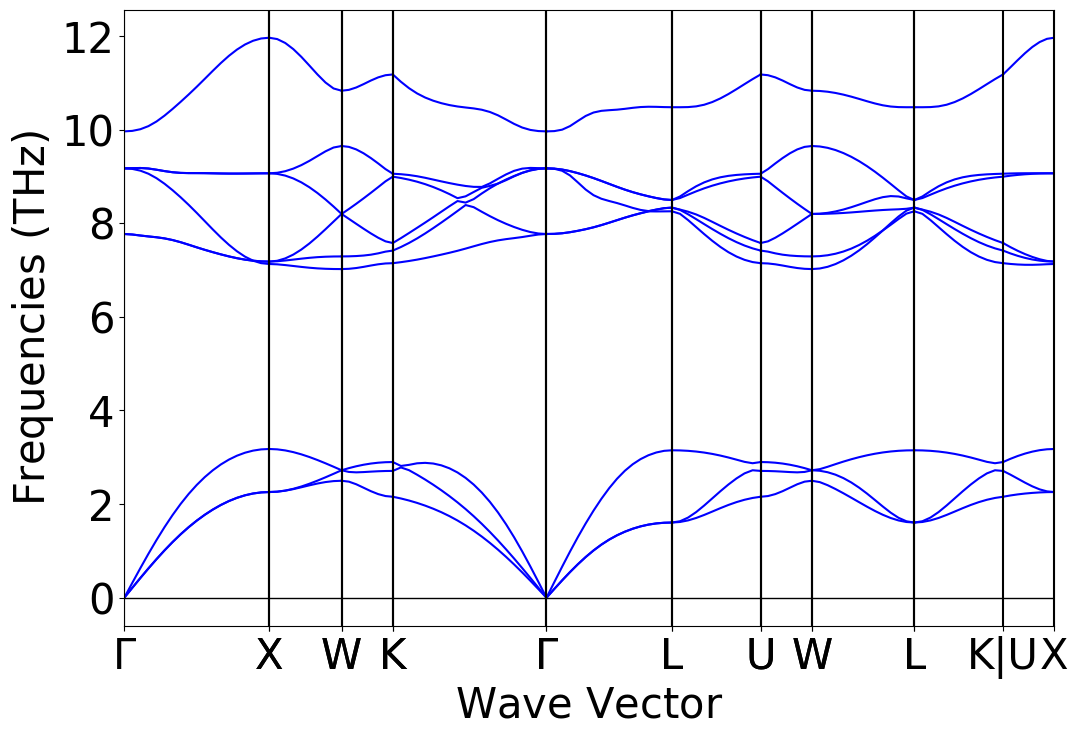

In [6]:
PhononBSPlotter(ph_bs).get_plot()

In [7]:
# Récupération de nos données
data = PhononBSPlotter(ph_bs).bs_plot_data()

frequency = data['frequency']
ticks = data['ticks']
distances = data['distances']

In [8]:
# Première direction
vitesse_son_1 = 2*np.pi*np.abs((frequency[0][1][1]-frequency[0][1][0])*(10**12))/((distances[0][1]-distances[0][0])*(10**10))
print("La vitesse du son de la courbe 1 dans la direction Gamma - X vaut {} m/s.".format(vitesse_son_1))

La vitesse du son de la courbe 1 dans la direction Gamma - X vaut 2460.661656881717 m/s.


In [9]:
vitesse_son_2 = 2*np.pi*np.abs((frequency[3][0][-1] - frequency[3][0][-2])*(10**12))/((distances[3][-1]-distances[3][-2])*(10**10))
print("La vitesse du son de la courbe 2 dans la direction K - Gamma vaut {} m/s.".format(vitesse_son_2))

La vitesse du son de la courbe 2 dans la direction K - Gamma vaut 2113.6058127235087 m/s.


In [10]:
vitesse_son_3 = 2*np.pi*np.abs((frequency[4][2][1]-frequency[4][2][0])*(10**12))/((distances[4][1]-distances[4][0])*(10**10))
print("La vitesse du son de la courbe 3 dans la direction Gamma - L vaut {} m/s.".format(vitesse_son_3))

La vitesse du son de la courbe 3 dans la direction Gamma - L vaut 3974.791069671656 m/s.


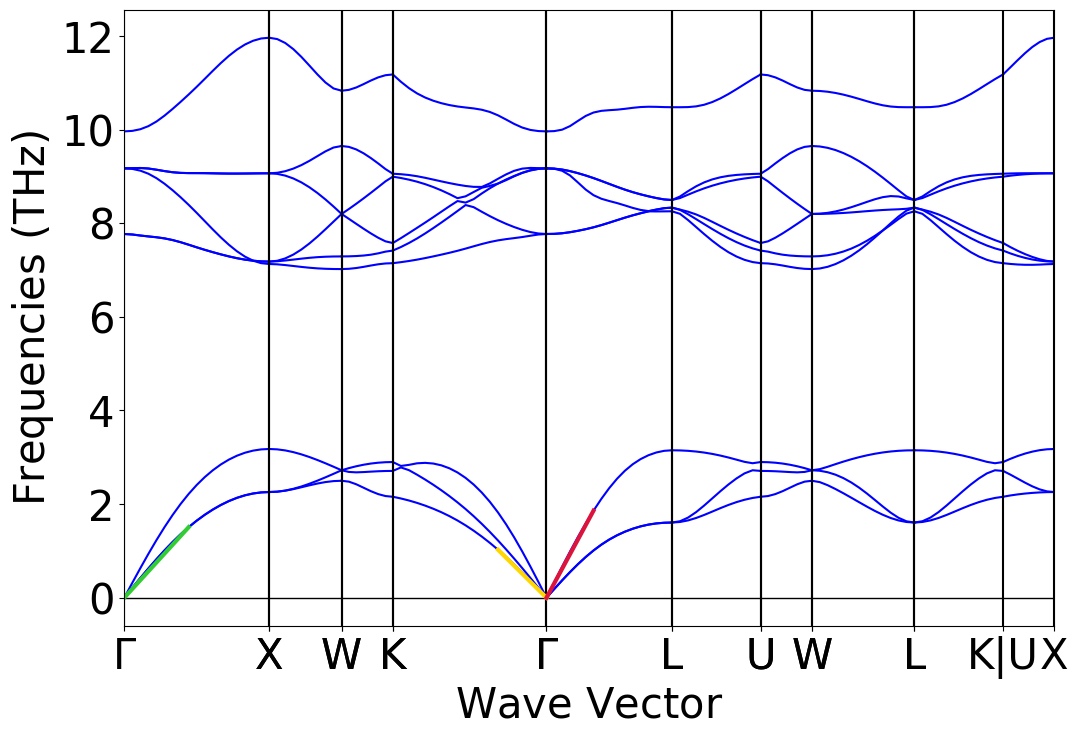

In [11]:
PhononBSPlotter(ph_bs).get_plot()

# Première pente en vert
plt.plot([distances[0][0],distances[0][0]+distances[0][8]-distances[0][0]],[frequency[0][1][0],frequency[0][1][0]+frequency[0][1][8]-frequency[0][1][0]], color='limegreen', lw=3)
# Deuxième pente en jaune
plt.plot([distances[3][13],distances[3][13]+distances[3][-1]-distances[3][13]],[frequency[3][0][13],frequency[3][0][13]+frequency[3][0][-1]-frequency[3][0][13]], color='gold', lw=3)
# Troisième pente en rouge
plt.plot([distances[4][0], distances[4][0]+distances[4][6]-distances[4][0]],[frequency[4][2][0],frequency[4][2][0]+frequency[4][2][6]-frequency[4][2][0]], color='crimson', lw=3)